### Analysis & Dataset Overview

This dataset has details of 1000 users from different backgrounds and whether or not they bought a bike. 

In this general summary, we will look at what the user factors are when purchasing a bicycle.

#### Import module

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean, median, mode, stdev

%matplotlib inline

In [2]:
sns.set()

#### import dataset

In [3]:
df = pd.read_csv("bike_buyers.csv")

In [4]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [5]:
x, y = df.shape

print(f"{x} Row")
print(f"{y} Columns")

1000 Row
13 Columns


#### We can look deeper through into data's information.

### Data Pre-Processing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 70.4+ KB


#### Basic Statistic

In [7]:
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,994.000000,992.000000,991.000000,992.000000
mean,19965.992000,56267.605634,1.910282,1.455096,44.181452
std,5347.333948,31067.817462,1.626910,1.121755,11.362007
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [8]:
df.describe(include = "O")

,Marital Status,Gender,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
count,993,989,1000,1000,996,1000,1000,1000
unique,2,2,5,5,2,5,3,2
top,Married,Male,Bachelors,Professional,Yes,0-1 Miles,North America,No
freq,535,500,306,276,682,366,508,519


In [9]:
df.isnull().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

Some columns have some missing values. If the number of missing values is not too significant, it will be filled rather than dropped.

#### Handling Missing Value

Previously, we will check outliers in several columns to define which treatment is effective for each column.

#### 1. Numerical Columns

#### Check data outliers

In [10]:
num = ["Income", "Children", "Cars", "Age"]
df[num].head()

,Income,Children,Cars,Age
0,40000.0,1.0,0.0,42.0
1,30000.0,3.0,1.0,43.0
2,80000.0,5.0,2.0,60.0
3,70000.0,0.0,1.0,41.0
4,30000.0,0.0,0.0,36.0


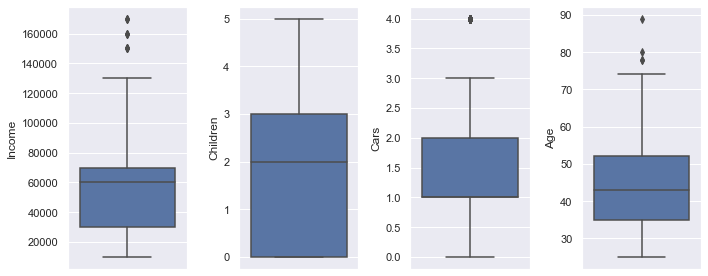

In [11]:
plt.figure(figsize = (10, 4))
for i in range(0, len(num)):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y = df[num[i]])
    plt.tight_layout()

Outliers can be identified in the Income, Cars, and Age columns. We'll dig deeper into the outlier data in the income column.

##### Missing Value - Income

In [12]:
df["Income"].describe()

count       994.000000
mean      56267.605634
std       31067.817462
min       10000.000000
25%       30000.000000
50%       60000.000000
75%       70000.000000
max      170000.000000
Name: Income, dtype: float64

In [13]:
Q1 = 30000
Q3 = 70000

IQR = Q3 - Q1
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)

print("Income")
print("IQR =", IQR)
print("Upper fence =", upper_fence)
print("Lower fence =", lower_fence)

Income
IQR = 40000
Upper fence = 130000.0
Lower fence = -30000.0


In [14]:
income_outlier = df[(df["Income"] < lower_fence) | (df["Income"] > upper_fence)]

In [15]:
x, y = income_outlier.shape

print(f"{x} row outliers in the income column")

10 row outliers in the income column


In [16]:
income_outlier

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
6,27974,Single,Male,160000.0,2.0,High School,Management,NaN,4.0,0-1 Miles,Pacific,33.0,Yes
12,11434,Married,Male,170000.0,5.0,Partial College,Professional,Yes,NaN,0-1 Miles,Europe,55.0,No
43,17185,Married,Female,170000.0,4.0,Partial College,Professional,No,3.0,5-10 Miles,Europe,48.0,Yes
121,15922,Married,Male,150000.0,2.0,High School,Professional,Yes,4.0,0-1 Miles,Europe,48.0,No
178,14191,Married,Male,160000.0,4.0,Partial College,Professional,No,2.0,10+ Miles,Europe,55.0,Yes
259,12705,Married,Male,150000.0,0.0,Bachelors,Management,Yes,4.0,0-1 Miles,Pacific,37.0,Yes
321,16675,Single,Female,160000.0,0.0,Graduate Degree,Management,No,3.0,0-1 Miles,Pacific,47.0,Yes
356,23608,Married,Female,150000.0,3.0,High School,Professional,Yes,3.0,0-1 Miles,Europe,51.0,Yes
829,16009,Single,Male,170000.0,1.0,Graduate Degree,Management,No,4.0,0-1 Miles,North America,66.0,No
993,11292,Single,Male,150000.0,1.0,Partial College,Professional,No,3.0,0-1 Miles,North America,44.0,Yes


In [17]:
df["Occupation"].unique()

array(['Skilled Manual', 'Clerical', 'Professional', 'Manual',
       'Management'], dtype=object)

In [18]:
df["Cars"].unique()

array([ 0.,  1.,  2.,  4., nan,  3.])

If we look at the table, we will assume that the outlier value in the income column is a real value (not a typo) because we have a reference from occupation with the value ("Professional" or "Management") and have more than one car.

In [19]:
miss_income = pd.isnull(df["Income"])
df[miss_income]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
9,19280,Married,Male,NaN,2.0,Partial College,Manual,Yes,1.0,0-1 Miles,Europe,NaN,Yes
110,21006,Single,Female,NaN,1.0,Partial College,Manual,No,0.0,0-1 Miles,Europe,46.0,Yes
191,26944,Single,Male,NaN,2.0,High School,Manual,Yes,0.0,0-1 Miles,Europe,36.0,Yes
301,17926,NaN,Female,NaN,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Pacific,28.0,Yes
441,11061,Married,Male,NaN,2.0,Partial College,Skilled Manual,Yes,2.0,5-10 Miles,Pacific,52.0,Yes
509,24357,Married,Male,NaN,3.0,Bachelors,Professional,Yes,1.0,2-5 Miles,North America,48.0,Yes


Because there are several outliers, use the median to fill in the missing value in the Income column.

In [20]:
df["Income"].describe()

count       994.000000
mean      56267.605634
std       31067.817462
min       10000.000000
25%       30000.000000
50%       60000.000000
75%       70000.000000
max      170000.000000
Name: Income, dtype: float64

In [21]:
df["Income"].mode()

0    60000.0
dtype: float64

In [22]:
df["Income"].fillna(df["Income"].median(), inplace = True)

In [23]:
df[miss_income]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
9,19280,Married,Male,60000.0,2.0,Partial College,Manual,Yes,1.0,0-1 Miles,Europe,NaN,Yes
110,21006,Single,Female,60000.0,1.0,Partial College,Manual,No,0.0,0-1 Miles,Europe,46.0,Yes
191,26944,Single,Male,60000.0,2.0,High School,Manual,Yes,0.0,0-1 Miles,Europe,36.0,Yes
301,17926,NaN,Female,60000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Pacific,28.0,Yes
441,11061,Married,Male,60000.0,2.0,Partial College,Skilled Manual,Yes,2.0,5-10 Miles,Pacific,52.0,Yes
509,24357,Married,Male,60000.0,3.0,Bachelors,Professional,Yes,1.0,2-5 Miles,North America,48.0,Yes


##### Missing Value - Cars

In [24]:
miss_car = pd.isnull(df["Cars"])
df[miss_car]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
12,11434,Married,Male,170000.0,5.0,Partial College,Professional,Yes,NaN,0-1 Miles,Europe,55.0,No
196,16209,Single,Female,50000.0,0.0,Graduate Degree,Skilled Manual,Yes,NaN,1-2 Miles,Europe,36.0,No
202,18626,Single,Male,40000.0,2.0,Partial College,Clerical,Yes,NaN,1-2 Miles,Europe,33.0,Yes
351,13572,Single,Male,10000.0,3.0,High School,Manual,Yes,NaN,0-1 Miles,Europe,37.0,Yes
448,11383,Married,Female,30000.0,3.0,Graduate Degree,Clerical,Yes,NaN,0-1 Miles,Europe,46.0,No
511,12207,Single,Male,80000.0,4.0,Bachelors,Management,Yes,NaN,5-10 Miles,North America,66.0,Yes
561,27218,Married,Female,20000.0,2.0,Partial High School,Clerical,No,NaN,0-1 Miles,North America,48.0,No
615,11538,Single,Female,60000.0,4.0,Graduate Degree,Skilled Manual,No,NaN,0-1 Miles,North America,47.0,Yes
933,11941,Single,Male,60000.0,0.0,Partial College,Skilled Manual,Yes,NaN,5-10 Miles,North America,29.0,No


In [25]:
df["Cars"].describe()

count    991.000000
mean       1.455096
std        1.121755
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: Cars, dtype: float64

In [26]:
df["Cars"].mode()

0    2.0
dtype: float64

Based on the amount of income, we will fill in the missing value in the cars column. Fill in 1 if the income is less than 50,000, and 2 if the income is greater than 50,000.

In [27]:
df["Cars"] = df["Cars"].fillna(pd.Series(np.where(df["Income"] <= 50000, 1, 2)))

##### Missing Value - Age

In [28]:
miss_age = pd.isnull(df["Age"])
df[miss_age]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
9,19280,Married,Male,60000.0,2.0,Partial College,Manual,Yes,1.0,0-1 Miles,Europe,NaN,Yes
98,19441,NaN,Male,40000.0,0.0,Graduate Degree,Clerical,Yes,0.0,0-1 Miles,Europe,NaN,Yes
225,14135,Married,Male,20000.0,1.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,NaN,No
371,22918,Single,Male,80000.0,5.0,Graduate Degree,Management,Yes,3.0,0-1 Miles,Pacific,NaN,No
554,18580,Married,Female,60000.0,2.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,NaN,Yes
688,11699,Single,NaN,60000.0,NaN,Bachelors,Skilled Manual,No,2.0,0-1 Miles,North America,NaN,No
770,17699,Married,Male,60000.0,1.0,Graduate Degree,Skilled Manual,No,0.0,0-1 Miles,North America,NaN,No
986,23704,Single,Male,40000.0,5.0,High School,Professional,Yes,4.0,10+ Miles,North America,NaN,Yes


In [29]:
df["Age"].describe()

count    992.000000
mean      44.181452
std       11.362007
min       25.000000
25%       35.000000
50%       43.000000
75%       52.000000
max       89.000000
Name: Age, dtype: float64

In [30]:
df["Age"].mode()

0    40.0
dtype: float64

Because there are outliers, fill in the missing value in the Age column with the median.

In [31]:
df["Age"].fillna(df["Age"].median(), inplace = True)

##### Missing Value - Children

In [32]:
miss_children = pd.isnull(df["Children"])
df[miss_children]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
117,24065,Single,Female,20000.0,NaN,High School,Manual,Yes,0.0,0-1 Miles,Europe,40.0,Yes
217,13673,Single,Female,20000.0,NaN,Partial High School,Manual,No,2.0,0-1 Miles,Europe,25.0,No
386,28957,Single,Female,120000.0,NaN,Partial High School,Professional,Yes,4.0,10+ Miles,Pacific,34.0,Yes
549,13453,Married,Female,130000.0,NaN,Bachelors,Management,Yes,3.0,0-1 Miles,North America,45.0,Yes
638,18949,Single,Male,70000.0,NaN,Graduate Degree,Management,Yes,2.0,5-10 Miles,North America,74.0,Yes
688,11699,Single,NaN,60000.0,NaN,Bachelors,Skilled Manual,No,2.0,0-1 Miles,North America,43.0,No
805,26778,Single,Female,40000.0,NaN,High School,Skilled Manual,Yes,2.0,5-10 Miles,North America,31.0,No
960,23491,Single,Male,100000.0,NaN,Partial College,Professional,No,4.0,1-2 Miles,North America,45.0,No


In [33]:
df["Children"].describe()

count    992.000000
mean       1.910282
std        1.626910
min        0.000000
25%        0.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Children, dtype: float64

In [34]:
df[miss_children].shape

(8, 13)

To fill in the missing value for children, we'll assume it's based on the Marital Status column, where married equals 1 and single equals 0.

In [35]:
df["Children"] = df["Children"].fillna(pd.Series(np.where(df["Marital Status"] == "Married", 1, 0)))

#### 2. Categorical Columns

##### Missing Value - Marital Status

In [36]:
miss_marital = pd.isnull(df["Marital Status"])
df[miss_marital]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
8,22155,NaN,Male,20000.0,2.0,Partial High School,Clerical,Yes,2.0,5-10 Miles,Pacific,58.0,No
27,18283,NaN,Female,100000.0,0.0,Bachelors,Professional,No,1.0,5-10 Miles,Pacific,40.0,No
49,14939,NaN,Male,40000.0,0.0,Bachelors,Clerical,Yes,0.0,0-1 Miles,Europe,39.0,Yes
98,19441,NaN,Male,40000.0,0.0,Graduate Degree,Clerical,Yes,0.0,0-1 Miles,Europe,43.0,Yes
150,26154,NaN,Male,60000.0,1.0,Partial College,Skilled Manual,Yes,1.0,5-10 Miles,Pacific,43.0,Yes
234,24611,NaN,Male,90000.0,0.0,Bachelors,Professional,No,4.0,10+ Miles,Pacific,35.0,Yes
301,17926,NaN,Female,60000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Pacific,28.0,Yes


In [37]:
df["Marital Status"].describe()

count         993
unique          2
top       Married
freq          535
Name: Marital Status, dtype: object

The children column will be used to fill in the missing value in the Marital Status column. Fill in the blanks with married if have children, and single if don't.

In [38]:
df["Marital Status"] = df["Marital Status"].fillna(pd.Series(np.where(df["Children"] >= 1, "Married", "Single")))

##### Missing Value - Gender

In [39]:
miss_gender = pd.isnull(df["Gender"])
df[miss_gender]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
154,23426,Single,NaN,80000.0,5.0,Graduate Degree,Management,Yes,3.0,0-1 Miles,Pacific,40.0,No
335,24369,Married,NaN,80000.0,5.0,Graduate Degree,Management,No,2.0,0-1 Miles,Pacific,39.0,No
601,29231,Single,NaN,80000.0,4.0,Partial College,Professional,No,2.0,0-1 Miles,North America,43.0,No
688,11699,Single,NaN,60000.0,0.0,Bachelors,Skilled Manual,No,2.0,0-1 Miles,North America,43.0,No
695,18390,Married,NaN,80000.0,5.0,Partial College,Professional,Yes,2.0,0-1 Miles,North America,44.0,No
867,26693,Married,NaN,70000.0,3.0,Partial College,Professional,Yes,1.0,5-10 Miles,North America,49.0,No
908,23195,Single,NaN,50000.0,3.0,Bachelors,Skilled Manual,Yes,2.0,2-5 Miles,North America,41.0,Yes
951,22296,Married,NaN,70000.0,0.0,Bachelors,Professional,No,1.0,0-1 Miles,North America,38.0,No
973,11734,Married,NaN,60000.0,1.0,Partial College,Skilled Manual,No,1.0,0-1 Miles,North America,47.0,No


In [40]:
df["Gender"].describe()

count      989
unique       2
top       Male
freq       500
Name: Gender, dtype: object

In [41]:
pd.crosstab(index = df["Gender"], columns = "Total")

col_0,Total
Gender,
Female,489
Male,500


According to the description above, there are a total of 1000 existing data. We assume that the number of users in this data is the same regardless of gender. As a result, the missing gender value will be filled with Female.

In [42]:
df["Gender"].fillna("Female", inplace = True)

In [43]:
pd.crosstab(index = df["Gender"], columns = "Total")

col_0,Total
Gender,
Female,500
Male,500


##### Missing Value - Home Owner

In [44]:
miss_home = pd.isnull(df["Home Owner"])
df[miss_home]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
6,27974,Single,Male,160000.0,2.0,High School,Management,NaN,4.0,0-1 Miles,Pacific,33.0,Yes
365,22636,Single,Female,40000.0,0.0,Bachelors,Clerical,NaN,0.0,0-1 Miles,Europe,38.0,Yes
646,16247,Single,Female,60000.0,4.0,Graduate Degree,Skilled Manual,NaN,0.0,1-2 Miles,North America,47.0,No
943,24322,Married,Female,60000.0,4.0,Bachelors,Skilled Manual,NaN,2.0,0-1 Miles,North America,42.0,No


In [45]:
df["Home Owner"].describe()

count     996
unique      2
top       Yes
freq      682
Name: Home Owner, dtype: object

Fill in the mode for the missing value in the home owner column; additionally, the number of missing values that are not significant is only 4 rows.

In [46]:
df["Home Owner"].fillna("Yes", inplace = True)

In [47]:
df.isnull().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

The data contains no missing values

#### Drop Duplicate

In [48]:
df.drop_duplicates()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,Female,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes
997,11809,Married,Female,60000.0,2.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,North America,38.0,Yes
998,19664,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No


In [49]:
print(df.duplicated().value_counts())

False    1000
dtype: int64


There is no data duplication

## Basic Analysis

In [50]:
pd.crosstab(index = df["Purchased Bike"], columns = "Total")

col_0,Total
Purchased Bike,
No,519
Yes,481


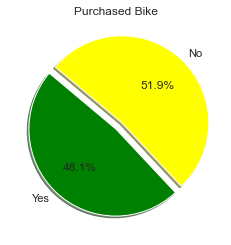

In [51]:
labels = "Yes", "No"
sizes = [481, 519]
explode = (0, 0.1)

plt.pie(sizes, labels = labels, explode = explode,
       autopct = "%1.1f%%",
        shadow = True,
        startangle = 140,
        colors = ["green", "yellow"]
       )
plt.title("Purchased Bike")
plt.show()

Even though the comparison is not large, there are more users who do not purchase bicycles.

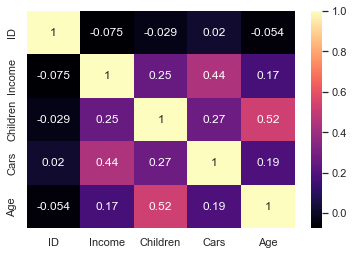

In [52]:
sns.heatmap(df.corr(), annot = True, cmap = "magma");

Numeric columns do not have a strong relationship.

#### Gender

In [53]:
df["Gender"].value_counts()

Male      500
Female    500
Name: Gender, dtype: int64

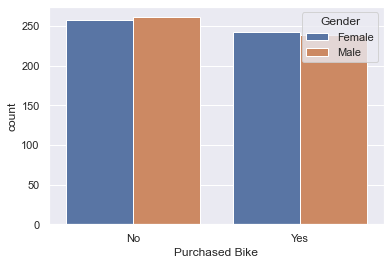

In [54]:
sns.countplot(x = "Purchased Bike",
              hue = "Gender",
              data = df);

Based on gender, the male and female numbers are nearly equal.

#### Marital Status

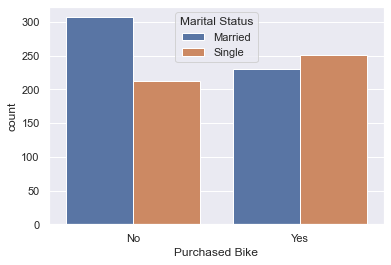

In [55]:
sns.countplot(x = "Purchased Bike",
              hue = "Marital Status",
              data = df);

Those who are married are less likely to purchase a bicycle.

#### Children

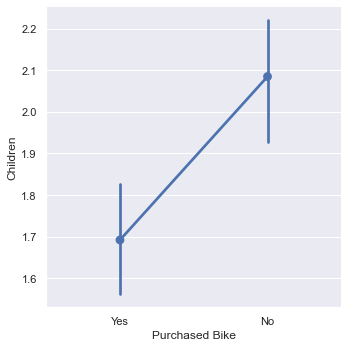

In [56]:
sns.catplot(x = "Purchased Bike",
           y = "Children",
           kind = "point",
           order = ["Yes", "No"],
           data = df)
plt.show()

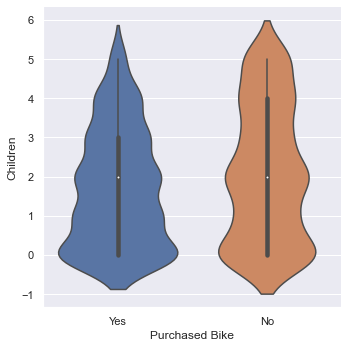

In [57]:
sns.catplot(x = "Purchased Bike",
           y = "Children",
           kind = "violin",
           order = ["Yes", "No"],
           data = df)
plt.show()

Those with two or more children are less likely to purchase a bicycle.

#### Age

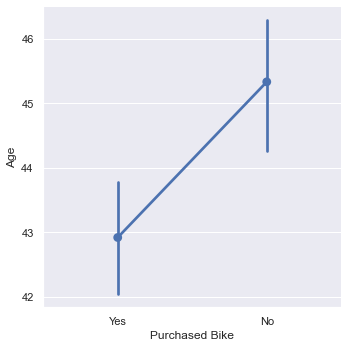

In [58]:
sns.catplot(x = "Purchased Bike",
           y = "Age",
           kind = "point",
           order = ["Yes", "No"],
           data = df)
plt.show()

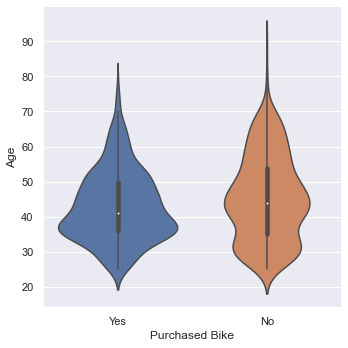

In [59]:
sns.catplot(x = "Purchased Bike",
           y = "Age",
           kind = "violin",
           order = ["Yes", "No"],
           data = df)
plt.show()

The age group most likely to purchase a bicycle is between the ages of 35 and 40.

#### Income

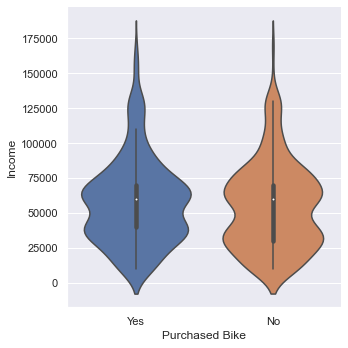

In [60]:
sns.catplot(x = "Purchased Bike",
           y = "Income",
           kind = "violin",
           order = ["Yes", "No"],
           data = df)
plt.show()

The user's income is not a consideration when purchasing a bicycle.

#### Cars

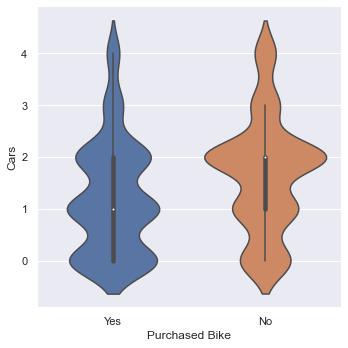

In [61]:
sns.catplot(x = "Purchased Bike",
           y = "Cars",
           kind = "violin",
           order = ["Yes", "No"],
           data = df)
plt.show()

Those who own two or more cars are less likely to purchase bicycles.

#### Commute Distance

In [62]:
pd.crosstab(index = df["Commute Distance"], columns = df["Purchased Bike"])

Purchased Bike,No,Yes
Commute Distance,,
0-1 Miles,166,200
1-2 Miles,92,77
10+ Miles,78,33
2-5 Miles,67,95
5-10 Miles,116,76


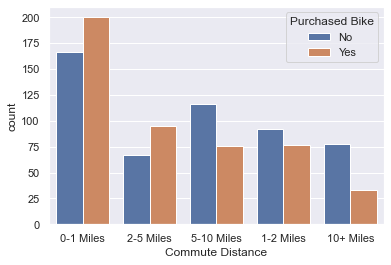

In [63]:
sns.countplot(x = "Commute Distance",
              hue = "Purchased Bike",
              data = df);

The shorter the commute distance, the more likely it is to be a deciding factor in purchasing a bicycle with the assumption that it will be a short distance while exercising.

#### Occupation

In [64]:
pd.crosstab(index = df["Purchased Bike"], columns = df["Occupation"])

Occupation,Clerical,Management,Manual,Professional,Skilled Manual
Purchased Bike,,,,,
No,89,100,64,126,140
Yes,88,73,55,150,115


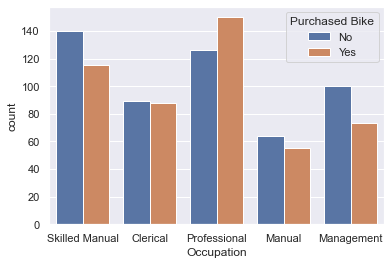

In [65]:
sns.countplot(x = "Occupation",
              hue = "Purchased Bike",
              data = df);

In the occupation column, there are some differences:
- Professionals tend to buy bicycles in inverse proportion to Skilled Manual and Management. 
- Clerical and Manual are nearly equal in value.

#### Region

In [66]:
pd.crosstab(index = df["Purchased Bike"], columns = df["Region"])

Region,Europe,North America,Pacific
Purchased Bike,,,
No,152,288,79
Yes,148,220,113


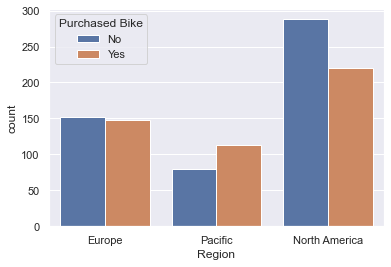

In [67]:
sns.countplot(x = "Region",
              hue = "Purchased Bike",
              data = df);

The difference in values in the region column is not too significant in each region. Except in North America, where many users do not purchase bicycles.